In [17]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)

In [26]:
kghm = pd.read_csv('kgh_d.csv', parse_dates=True, index_col='Data')
copper = pd.read_csv('ca_c_f_d.csv', parse_dates=True, index_col='Data')

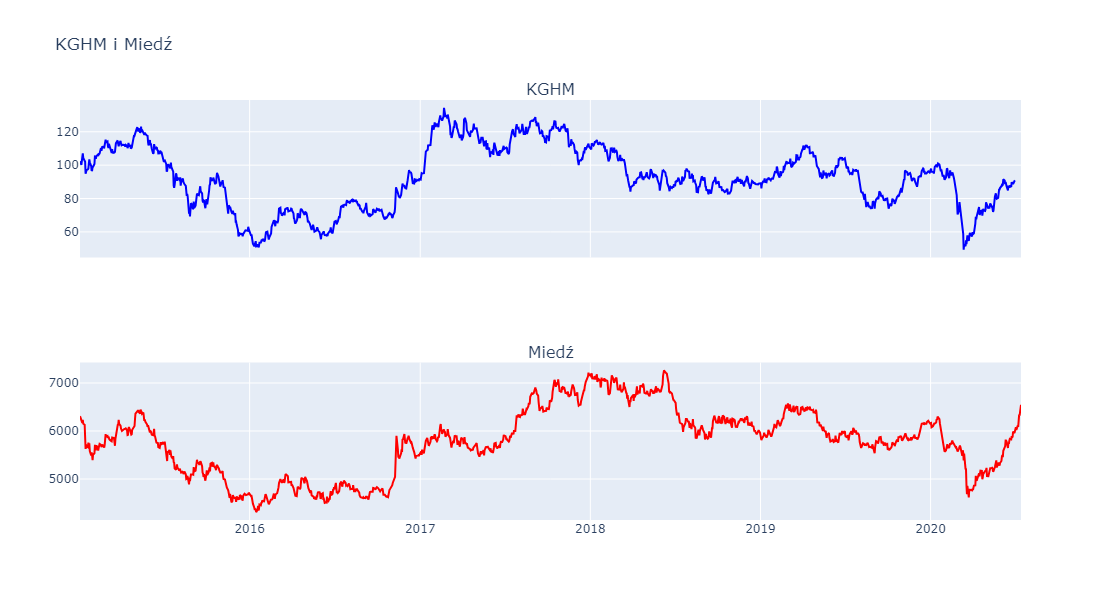

,Zamkniecie_KGHM,Zamkniecie_Miedz
Data,,
2015-01-02,102.40,6309.0
2015-01-05,100.09,6216.0
2015-01-07,104.89,6170.0
2015-01-08,107.11,6230.5
2015-01-09,104.33,6151.0


In [31]:

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    subplot_titles=('KGHM', 'Miedź'))

# Wykres KGHM
fig.add_trace(go.Scatter(x=kghm.index, y=kghm['Zamkniecie'], mode='lines', line=dict(color='blue'), name='KGHM'),
              row=1, col=1)

# Wykres Miedź
fig.add_trace(go.Scatter(x=copper.index, y=copper['Zamkniecie'], mode='lines', line=dict(color='red'), name='Miedź'),
              row=2, col=1)

# Aktualizacja layoutu
fig.update_layout(height=600, title_text="KGHM i Miedź", showlegend=False)

#łączenie tabel
combined_df = pd.merge(kghm[['Zamkniecie']], copper[['Zamkniecie']], 
left_index=True, right_index=True, suffixes=('_KGHM', '_Miedz'))

# Wyświetlenie wykresu i tabeli
pyo.iplot(fig)
combined_df.head()
